**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 201 Final Project
### &#9989; Stephen Fong
### &#9989; Section_001
#### &#9989; 4/5/21

# ___Covid-19: An Analysis of Herd Immunity___

## Background and Motivation

_(Covid vaccinations are important, and it remains uncertain how long it will take until we reach a vaccinated population large enough to slow the progression of covid-19.

An analysis of the number of covid-19 vaccinations by country would be useful to predict the amount of time before the

Questions to answer: 

How long until herd immunity is reached?

How many individuals must be vaccinated per country?

When will the world expect some level of normalcy?

   
`What is the tipping point (similar to the wild fire activity) of herd immunity for covid?`

`Are any countries close to this point?`

`How long will it take to reach this point?`

_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
covid_data = pd.read_csv('covid_country_vaccinations.csv')
covid_data

usmask = covid_data['country'] == 'United States'
covid_data[usmask]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7343,United States,USA,12/20/2020,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7344,United States,USA,12/21/2020,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7345,United States,USA,12/22/2020,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7346,United States,USA,12/23/2020,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7347,United States,USA,12/24/2020,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430,United States,USA,3/17/2021,113037627.0,73669956.0,39989196.0,2299771.0,2473762.0,33.80,22.03,11.96,7397.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7431,United States,USA,3/18/2021,115730008.0,75495716.0,40981464.0,2692381.0,2503731.0,34.60,22.57,12.25,7486.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7432,United States,USA,3/19/2021,118313818.0,77230061.0,41934629.0,2583810.0,2455116.0,35.38,23.09,12.54,7341.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7433,United States,USA,3/20/2021,121441497.0,79367225.0,43036818.0,3127679.0,2248285.0,36.31,23.73,12.87,6723.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [60]:
covid_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.705000e+03,4.192000e+03,2.839000e+03,3.961000e+03,7.430000e+03,4705.000000,4192.000000,2839.000000,7430.000000
mean,2.455033e+06,1.979287e+06,8.396236e+05,8.880542e+04,5.971636e+04,9.632512,7.394280,3.474195,2678.791655
std,8.804826e+06,6.479318e+06,3.387952e+06,2.772719e+05,2.056971e+05,17.342720,11.793498,7.500373,4202.469571
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.805600e+04,3.529225e+04,1.826200e+04,2.708000e+03,1.011250e+03,0.740000,0.740000,0.380000,358.000000
50%,2.601940e+05,2.382790e+05,1.037860e+05,1.352000e+04,5.952500e+03,3.590000,3.100000,1.400000,1265.000000
75%,1.252461e+06,9.716248e+05,4.729120e+05,5.657200e+04,2.752900e+04,10.350000,8.132500,3.085000,3092.750000
max,1.244814e+08,8.141577e+07,4.414123e+07,4.575496e+06,2.541597e+06,157.820000,89.400000,68.420000,54264.000000


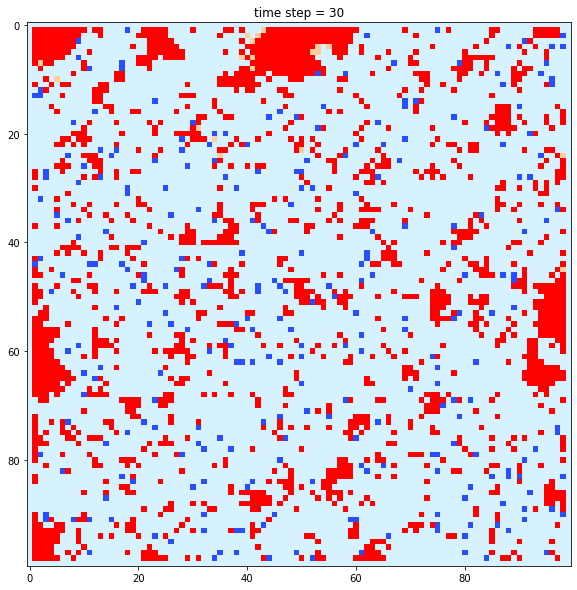

<Figure size 720x720 with 0 Axes>

In [569]:
from IPython.display import display, clear_output
import time
import random

size = 100

def world_gen(shape):

    '''
    0 = S (susceptible)
    1 = I (infectious)
    2 = R (recovered)
    3 = D (dead)
    4 = M (masked) N95 - 95% effective
    5 = V (vaccinated) - 95% effective
    '''
    
    # Border of recovered
    world = np.zeros(shape, dtype = int)
    
    world[:,0] = 2
    world[:,world.shape[1]-1] = 2
    world[0,:] = 2
    world[world.shape[0]-1,:] = 2
    
    
    # Initial infections
    initial_num_infected = 100
    
    for i in range(1,initial_num_infected+1):
        world[random.randint(2, size-1),random.randint(2, size-1)] = 1
    
    return world


def abm_update(old_state):
    
    current_state = np.copy(old_state)
    
    prob_recover = .825 # adjusted rate from current % of deaths https://www.worldometers.info/coronavirus/coronavirus-cases/
    prob_infection = 0.25
     
    
    num_rows = current_state.shape[0]
    num_columns = current_state.shape[1]
    
    row_start = 1
    row_end = num_rows 
    col_start = 1
    col_end = num_columns
    
    for row in range(row_start, row_end):
        for col in range(col_start, col_end):
            
            if old_state[row, col] == 1 and np.random.random() < prob_recover:
                current_state[row, col] = 2
            elif old_state[row, col] == 1 and np.random.random() > prob_recover:
                current_state[row, col] = 3
            elif old_state[row, col] == 0:
                num_inf_neighbors = (old_state[row-1:row+2,col-1:col+2] == 1).sum() 
                for _ in range(num_inf_neighbors):
                    if np.random.random() < prob_infection:
                        current_state[row, col] = 1
                    
    return current_state


rows = size # vertical height
columns = size # horizontal width
abm_world = world_gen((rows,columns))

t = []
S = []
I = []
R = []
D = []

# Figure
fig = plt.figure(figsize=(10,10))

# For loop - runtime
for index in range(30):
    
    t.append(index+1)
    
    # comment this out if you are using the animation code below
    #plt.subplot(5,5,index+1)
    
    plt.imshow(abm_world, vmin=0, vmax=5, cmap = 'flag') # why are vmin and vmax needed?
    plt.title("time step = {}".format(index+1), fontsize = 12)
    abm_world = abm_update(abm_world)

    # If you want an animation: (1) comment out the subplot command, (2) make
    # the figsize smaller, and (3) uncomment these lines.
    
    time.sleep(0.001) 
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    current_S = (abm_world == 0).sum(); S.append(current_S)
    current_I = (abm_world == 1).sum(); I.append(current_I)
    current_R = (abm_world == 2).sum(); R.append(current_R)
    current_D = (abm_world == 3).sum(); D.append(current_D)
    
plt.tight_layout()


Total population: 10000
Susceptible %: 16.23
Recovered %: 80.77
Death %: 3.441871982171598
Deaths: 278


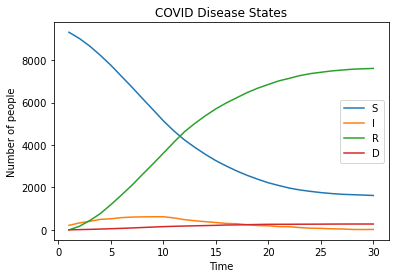

In [570]:
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R-R[0], label = 'R')
plt.plot(t, D, label = 'D')
plt.title("COVID Disease States")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of people')

total_pop = size**2
print('Total population:', total_pop)

susceptible_pop = min(S) / total_pop * 100
print('Susceptible %:', susceptible_pop)

recovery_rate = max(R) / total_pop * 100
print('Recovered %:', recovery_rate)

death_rate = max(D) / max(R) * 100
print('Death %:', death_rate)

print('Deaths:', max(D))

This current model represents the current progression of COVID-19

With a death rate between 2-4%, and only around 10% of the US population has contracted covid-19

Factors that do not affect death rate: Rate of infection and population size
1. This obviously does not reflect the real world because there are many people who are more at risk and immunocompromised. 

If the number of time steps were increased to allow the entire public to become infected, 2-4% of the population is expected to die. This is why it is encouraged to wash hands, wear masks, and to become vaccincated to slow the spread of covid-19 to protect those that are vulnerable, and to minimize the number of deaths. 


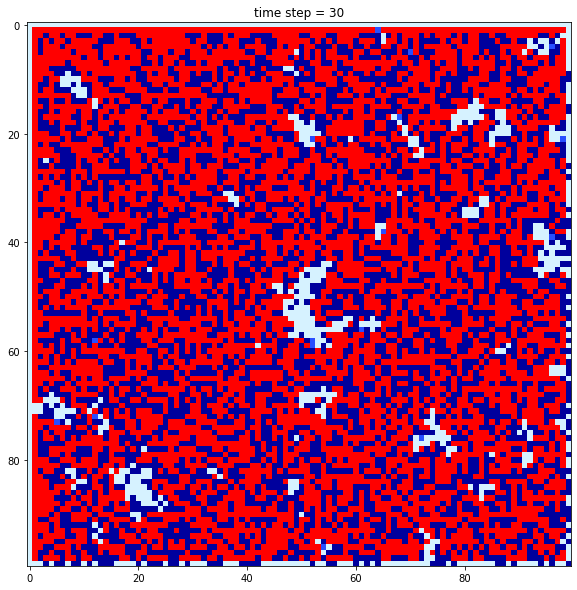

<Figure size 720x720 with 0 Axes>

In [588]:
size = 100
def world_gen(shape):

    '''
    0 = S (susceptible)
    1 = I (infectious)
    2 = R (recovered)
    3 = D (dead)
    4 = V (vaccinated) - 95% effective
    -5 = M (masked) N95 - 95% effective
    -6 = X (most at risk) - elderly, immunocompromised, or in general at risk of severe complications due to covid ~30%
    '''
    
    # Border of recovered
    world = np.zeros(shape, dtype = int)
    
    world[:,0] = 2
    world[:,world.shape[1]-1] = 2
    world[0,:] = 2
    world[world.shape[0]-1,:] = 2
    
    
    # Initial infections - 1
    initial_num_infected = round(size**2 * 0.01)
    for i in range(1,initial_num_infected+1): 
        world[random.randint(2, size-1),random.randint(2, size-1)] = 1
    
    # Initial vaccinated - 4
    initial_num_vacc = round(size**2 * 0.5)
    for i in range(1,initial_num_vacc+1): 
        world[random.randint(2, size-1),random.randint(2, size-1)] = 4
        
    return world


def abm_update(old_state):
    
    current_state = np.copy(old_state)
    
    prob_recover = 0.825 # adjusted rate from current % of deaths https://www.worldometers.info/coronavirus/coronavirus-cases/
    prob_infection = 0.25
    
    num_rows = current_state.shape[0]
    num_columns = current_state.shape[1]
    
    row_start = 1
    row_end = num_rows 
    col_start = 1
    col_end = num_columns
    
    for row in range(row_start, row_end):
        for col in range(col_start, col_end):
    
            
            if old_state[row, col] == 1 and np.random.random() < prob_recover:
                current_state[row, col] = 2
            elif old_state[row, col] == 1 and np.random.random() > prob_recover:
                current_state[row, col] = 3
                
            elif old_state[row, col] == 0:
                num_inf_neighbors = (old_state[row-1:row+2,col-1:col+2] == 1).sum() 
                for _ in range(num_inf_neighbors):
                    if np.random.random() < prob_infection:
                        current_state[row, col] = 1
                
    return current_state


rows = size # vertical height
columns = size # horizontal width
abm_world = world_gen((rows,columns))

t = []
S = []
I = []
R = []
D = []
V = []

# Figure
fig = plt.figure(figsize=(10,10))

# For loop - runtime
for index in range(30):
    
    t.append(index+1)
    
    # comment this out if you are using the animation code below
    #plt.subplot(5,5,index+1)
    
    plt.imshow(abm_world, vmin=0, vmax=5, cmap = 'flag') # why are vmin and vmax needed?
    plt.title("time step = {}".format(index+1), fontsize = 12)
    abm_world = abm_update(abm_world)

    # If you want an animation: (1) comment out the subplot command, (2) make
    # the figsize smaller, and (3) uncomment these lines.
    
    time.sleep(0.001) 
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    current_S = (abm_world == 0).sum(); S.append(current_S)
    current_I = (abm_world == 1).sum(); I.append(current_I)
    current_R = (abm_world == 2).sum(); R.append(current_R)
    current_D = (abm_world == 3).sum(); D.append(current_D)
    current_V = (abm_world == 4).sum(); V.append(current_V)
  
plt.tight_layout()


Total population: 10000
Susceptible %: 57.75
Recovered %: 23.3
Mortality Rate: 3.304721030042918 %
Deaths / total population: 0.77 %


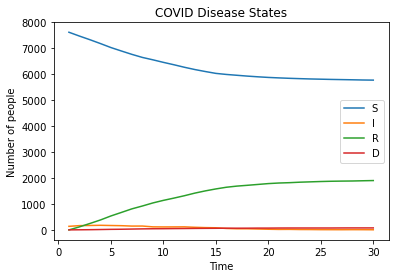

In [584]:
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R-R[0], label = 'R')
plt.plot(t, D, label = 'D')
plt.title("COVID Disease States")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of people')

total_pop = size**2
print('Total population:', total_pop)

susceptible_pop = min(S) / total_pop * 100
print('Susceptible %:', susceptible_pop)

recovery_rate = max(R) / total_pop * 100
print('Recovered %:', recovery_rate)

death_rate = max(D) / max(R) * 100
print('Mortality Rate:', death_rate, '%')

print('Deaths / total population:', max(D) / total_pop * 100, '%')

This model shows what would happen if there was no vaccine and 

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_